In [61]:
import pandas as pd
from sklearn import decomposition as pcad
from sklearn.preprocessing import normalize as norm
import matplotlib.pyplot as plt
import numpy as np

### Download the data from http://knoema.es/atlas/sources/WEF

Read the data and put it in a dataframe

In [3]:
gitr_data=pd.read_csv("ObservationData_nkzdwfb.csv",sep=",")

See which columns are available

In [4]:
gitr_data.columns

Index(['country', 'indicator', 'measure', 'Unit', 'Date', 'Value'], dtype='object')

See which countries are available

In [11]:
countries=gitr_data['country'].unique()
countries

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hong Kong SAR', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Latvia', 'Luxembourg',
       'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Portugal',
       'Singapore', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Taiwan, China', 'United Kingdom', 'United States',
       'Armenia', 'Azerbaijan', 'Georgia', 'Kazakhstan', 'Kyrgyz Republic',
       'Moldova', 'Russian Federation', 'Tajikistan', 'Ukraine',
       'Bangladesh', 'Bhutan', 'Cambodia', 'China', 'India', 'Indonesia',
       'Lao PDR', 'Malaysia', 'Mongolia', 'Myanmar', 'Nepal',
       'Philippines', 'Sri Lanka', 'Thailand', 'Vietnam', 'Albania',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Hungary',
       'Lithuania', 'Macedonia, FYR', 'Montenegro', 'Poland', 'Romania',
       'Serbia', 'Turkey', 'Arg

Looking which fields are important for features, values and identification

In [97]:
gitr_data[gitr_data['country']=='Uganda'][['country','indicator','Value']].head(3)

,country,indicator,Value
9146,Uganda,Networked Readiness Index,3.1
9147,Uganda,Environment subindex,3.7
9148,Uganda,Political and regulatory environment,3.7


Test modifying a country data so it behaves as a set of features for an observation

In [17]:
gitr_data[gitr_data['country']=='Uganda'][['indicator','Value']].set_index('indicator').rename(columns={'Value':'Uganda'}).transpose()

indicator,Networked Readiness Index,Environment subindex,Political and regulatory environment,"Effectiveness of law-making bodies, 1-7 (best)","Laws relating to ICTs, 1-7 (best)","Judicial independence, 1-7 (best)","Efficiency of legal system in settling disputes, 1-7 (best)","Efficiency of legal system in challenging regs, 1-7 (best)","Intellectual property protection, 1-7 (best)",No. procedures to enforce a contract,...,Economic impacts,"Impact of ICTs on new services & products, 1-7 (best)","ICT PCT patents, applications/million pop.","Impact of ICTs on new organizational models, 1-7 (best)","Knowledge-intensive jobs, % workforce",Social impacts,"Impact of ICTs on access to basic services, 1-7 (best)","Internet access in schools, 1-7 (best)","ICT use & gov’t efficiency, 1-7 (best)","E-Participation Index, 0–1 (best)"
Uganda,3.1,3.7,3.7,4.0,3.4,3.4,3.8,3.6,3.3,38.0,...,2.6,4.3,0.0,3.7,4.1,3.1,3.5,3.2,4.0,0.14


Generalizing the previous step to all the data

In [18]:
dfA=list()
for country in countries:
    df=gitr_data[gitr_data['country']==country][['indicator','Value']].set_index('indicator').rename(columns={'Value':country}).transpose()
    dfA.append(df)
gitr_featured=pd.concat(dfA)

Looking the results

In [96]:
gitr_featured.head(3)

,"Availability of latest technologies, 1-7 (best)",Business and innovation environment,Business usage,"Business-to-business Internet use, 1-7 (best)","Business-to-consumer Internet use, 1-7 (best)","Capacity for innovation, 1-7 (best)",Economic impacts,"Effectiveness of law-making bodies, 1-7 (best)","Efficiency of legal system in challenging regs, 1-7 (best)","Efficiency of legal system in settling disputes, 1-7 (best)",...,"Quality of management schools, 1-7 (best)","Quality of math & science education, 1-7 (best)",Readiness subindex,Secure Internet servers/million pop.,Skills,Social impacts,"Total tax rate, % profits",Usage subindex,"Use of virtual social networks, 1-7 (best)","Venture capital availability, 1-7 (best)"
Australia,5.9,5.1,4.8,5.5,5.5,4.8,4.7,4.8,4.7,4.9,...,5.3,4.8,6.2,1348.6,6.0,5.7,47.6,5.4,6.0,3.1
Austria,6.1,4.7,5.6,5.7,5.4,5.4,4.9,4.2,4.7,5.0,...,4.9,4.6,6.3,1267.7,5.7,5.2,51.7,5.4,5.8,2.9
Belgium,6.2,5.1,5.2,5.7,5.3,5.3,4.9,4.3,4.7,4.5,...,6.0,6.0,6.1,854.2,6.4,5.1,58.4,5.2,6.1,3.5


As we have seen, there are some NaN values. For this particular case, they won't help to identify features. Therefore we drop them out

In [95]:
gitr_featured.dropna(axis=1,inplace=True)
gitr_featured.head(3)

,"Availability of latest technologies, 1-7 (best)",Business and innovation environment,Business usage,"Business-to-business Internet use, 1-7 (best)","Business-to-consumer Internet use, 1-7 (best)","Capacity for innovation, 1-7 (best)",Economic impacts,"Effectiveness of law-making bodies, 1-7 (best)","Efficiency of legal system in challenging regs, 1-7 (best)","Efficiency of legal system in settling disputes, 1-7 (best)",...,"Quality of management schools, 1-7 (best)","Quality of math & science education, 1-7 (best)",Readiness subindex,Secure Internet servers/million pop.,Skills,Social impacts,"Total tax rate, % profits",Usage subindex,"Use of virtual social networks, 1-7 (best)","Venture capital availability, 1-7 (best)"
Australia,5.9,5.1,4.8,5.5,5.5,4.8,4.7,4.8,4.7,4.9,...,5.3,4.8,6.2,1348.6,6.0,5.7,47.6,5.4,6.0,3.1
Austria,6.1,4.7,5.6,5.7,5.4,5.4,4.9,4.2,4.7,5.0,...,4.9,4.6,6.3,1267.7,5.7,5.2,51.7,5.4,5.8,2.9
Belgium,6.2,5.1,5.2,5.7,5.3,5.3,4.9,4.3,4.7,4.5,...,6.0,6.0,6.1,854.2,6.4,5.1,58.4,5.2,6.1,3.5


Now to see the relationship between these countries based on the previous features we proceed with a correlation as a way to measure their similarities

In [94]:
gitr_featured_cor=gitr_featured.transpose().corr()
gitr_featured_cor.head(3)

,Australia,Austria,Belgium,Canada,Cyprus,Czech Republic,Denmark,Estonia,Finland,France,...,Nigeria,Rwanda,Senegal,Seychelles,South Africa,Swaziland,Tanzania,Uganda,Zambia,Zimbabwe
Australia,1.000000,0.999051,0.999036,0.998181,0.969107,0.998389,0.978675,0.999417,0.999850,0.998703,...,0.311444,0.107942,0.336468,0.976881,0.990290,0.347628,0.211794,0.172799,0.827180,0.839193
Austria,0.999051,1.000000,0.998264,0.994747,0.973076,0.996397,0.986235,0.997240,0.999249,0.996108,...,0.323523,0.122125,0.348182,0.979360,0.986749,0.359351,0.224660,0.185864,0.830226,0.841962
Belgium,0.999036,0.998264,1.000000,0.997659,0.975854,0.999255,0.977800,0.998858,0.998776,0.999050,...,0.341094,0.138935,0.366025,0.982619,0.993838,0.376880,0.242443,0.203543,0.844511,0.855208


We must consider that correlations are also negative. Thus, we need to normalize them from zero to one, in order to use the results in VOS Viewer network. This is because the network file can't have negative values

In [93]:
gitr_featured_cor=(gitr_featured_cor-gitr_featured_cor.min())/(gitr_featured_cor.max()-gitr_featured_cor.min())
gitr_featured_cor.head(3)

,Australia,Austria,Belgium,Canada,Cyprus,Czech Republic,Denmark,Estonia,Finland,France,...,Nigeria,Rwanda,Senegal,Seychelles,South Africa,Swaziland,Tanzania,Uganda,Zambia,Zimbabwe
Australia,1.000000,0.999011,0.998977,0.998139,0.957836,0.998276,0.977652,0.999397,0.999847,0.998654,...,0.217694,0.057786,0.230165,0.969689,0.988994,0.242101,0.137830,0.115076,0.740485,0.758195
Austria,0.999025,1.000000,0.998158,0.994626,0.963252,0.996145,0.985575,0.997146,0.999236,0.995961,...,0.231418,0.072768,0.243755,0.972939,0.984980,0.255719,0.151903,0.129053,0.745059,0.762360
Belgium,0.999010,0.998191,1.000000,0.997605,0.967044,0.999203,0.976735,0.998819,0.998754,0.999014,...,0.251381,0.090522,0.264457,0.977212,0.993016,0.276084,0.171355,0.147966,0.766510,0.782278


Finally, we proceed to save the results. But, we have to consider that a VOS network file, starts without a header. ID and values to the right, no column headers. Therefore, we proceed to omit it.

In [90]:
gitr_featured_cor.to_csv("gitr_featured_cor.csv",header=False)

# OPTIONAL: Transform the features from many to 2. And test the results

In [25]:
pca = pcad.PCA(n_components=2)
pca.fit(gitr_featured)
X = pca.transform(gitr_featured)

In [79]:
Xn=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

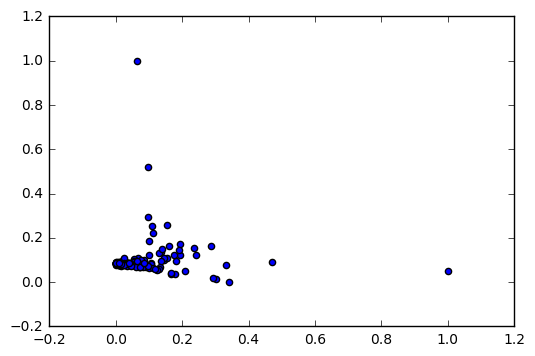

In [80]:
fig = plt.figure()
plt.scatter(Xn[:,0],Xn[:,1])
plt.show()

In [92]:
pd.DataFrame(Xn).set_index(gitr_featured.index).rename(columns={0:'F1',1:'F2'}).head(3)

,F1,F2
Australia,0.193104,0.123688
Austria,0.136844,0.135847
Belgium,0.131579,0.130669
